useful resource: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [1]:
#code needed to use colab notebook
#if you're using juptyer notebook then skip this line
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## these modules need to be installed before starting

In [1]:
%pip install chart_studio 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scattertext

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m spacy download en_core_web_sm

  Stored in directory: C:\Users\atryf\AppData\Local\Temp\pip-ephem-wheel-cache-s0zm43u3\wheels\be\ec\e4\29a68c7de525fcfa2d898cc27d2b945fe7cd966feeb2d85e0b
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [6]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install cufflinks

  Stored in directory: C:\Users\atryf\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install spacy

  Stored in directory: C:\Users\atryf\AppData\Local\pip\Cache\wheels\33\96\74\01741d5dde3d866a4461a05b3fc6aa43bd7ece8729a7264bf7
Successfully built wasabi
  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
  Found existing installation: importlib-metadata 0.17
    Uninstalling importlib-metadata-0.17:
      Successfully uninstalled importlib-metadata-0.17
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
from collections import Counter
import scattertext as st
import spacy
from pprint import pprint
import en_core_web_sm
#nlp = spacy.load('en_core_web_md')
nlp = en_core_web_sm.load()

Loading BokehJS ...

In [4]:
%cd "gdrive/My Drive/Colab Notebooks"
#%cd ..
!ls

[WinError 3] The system cannot find the path specified: 'gdrive/My Drive/Colab Notebooks'
C:\Users\atryf\Desktop\Andreas\ESADE\Capstone\GunControl


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# load train_cleaned.csv
filename = "20200625-155513_gun_control_nlp_subs_clean.csv"
df = pd.read_csv(filename, index_col=0)

df.head()

,Bias_num,text
0,0,Dawkins is famous as the author of Selfish Ge...
1,0,Of the last five pandemics the world has faced...
2,0,"Oh, thank you Fairey Thank you Thank you. Very..."
3,0,Im the attorney first CFI and Im the person pr...
4,0,Susis had a complex and thing because I heard ...


## Analysis

In [4]:
#calculate number of characters
df['review_len'] = df['text'].astype(str).apply(len)

#calculate number of words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.head()

,Bias_num,text,review_len,word_count
0,0,Dawkins is famous as the author of Selfish Ge...,7914,1486
1,0,Of the last five pandemics the world has faced...,4997,755
2,0,"Oh, thank you Fairey Thank you Thank you. Very...",61566,11866
3,0,Im the attorney first CFI and Im the person pr...,48234,9310
4,0,Susis had a complex and thing because I heard ...,6536,1333


In [5]:
#average number of characters by bias

df.groupby('Bias_num').mean()

,review_len,word_count
Bias_num,,
0,17598.413043,3169.608696
1,5899.500000,957.500000


(array([23.,  8.,  8.,  4.,  1.,  1.,  2.,  0.,  2.,  1.]),
 array([ 1917. ,  8629.1, 15341.2, 22053.3, 28765.4, 35477.5, 42189.6,
        48901.7, 55613.8, 62325.9, 69038. ]),
 <a list of 10 Patch objects>)

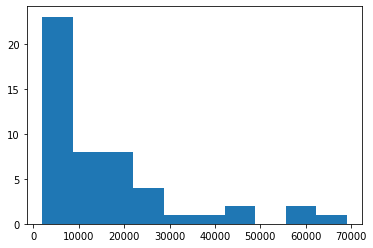

In [6]:
plt.hist(df['review_len'])

(array([24.,  9.,  8.,  2.,  1.,  0.,  2.,  1.,  0.,  3.]),
 array([  365. ,  1574.9,  2784.8,  3994.7,  5204.6,  6414.5,  7624.4,
         8834.3, 10044.2, 11254.1, 12464. ]),
 <a list of 10 Patch objects>)

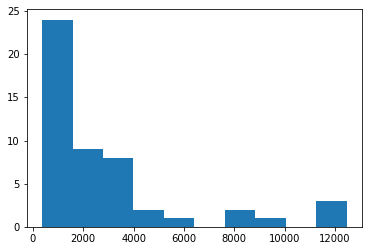

In [7]:
plt.hist(df['word_count'])

In [8]:
x1 = df.loc[df['Bias_num'] == 1, 'word_count']
x0 = df.loc[df['Bias_num'] == 0, 'word_count']

trace1 = go.Histogram(
    x=x0, name='Left',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Right',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of word count based on bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
x1 = df.loc[df['Bias_num'] == 1, 'review_len']
x0 = df.loc[df['Bias_num'] == 0, 'review_len']

trace1 = go.Histogram(
    x=x0, name='Left',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Right',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Number of characters in subtitley by bias')
fig = go.Figure(data=data, layout=layout)
fig.show()

## The distribution of top unigrams before removing stop words

In [10]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1
df1.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')

,text,count
0,the,6145
1,and,4665
2,to,3731
3,of,3412
4,you,3089
5,that,2908
6,in,2279
7,it,2017
8,is,1991
9,was,1234


## The distribution of top unigrams after removing stop words

In [11]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2
df2.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review after removing stop words')

,text,count
0,know,1022
1,just,799
2,like,788
3,think,651
4,people,641
5,thats,555
6,dont,465
7,im,420
8,got,347
9,youre,340


## The distribution of top bigrams before removing stop words

In [12]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3
df3.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review before removing stop words')


,text,count
0,you know,641
1,of the,574
2,in the,543
3,to be,272
4,it was,264
5,this is,258
6,if you,258
7,and the,233
8,on the,217
9,to the,216


## The distribution of top bigrams after removing stop words

In [13]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4
df4.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

,text,count
0,dont know,123
1,ive got,55
2,united states,46
3,youve got,45
4,little bit,39
5,new york,35
6,carbon dioxide,35
7,thats thats,34
8,dont think,34
9,think thats,33


## The distribution of Top trigrams before removing stop words

In [14]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5
df5.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review before removing stop words')

,text,count
0,one of the,73
1,in the world,54
2,you know and,53
3,the united states,43
4,you have to,43
5,going to be,39
6,do you think,35
7,you want to,35
8,what do you,34
9,and if you,32


## The distribution of Top trigrams after removing stop words

In [15]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df6
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')

## Find top trigrams after removing stop words for RIGHT

In [16]:
#create df with only right subtitles
right = df[df['Bias_num']==1]
right.head(1)

#create df with only left subtitles
left = df[df['Bias_num']==0]
left.head(1)

,Bias_num,text,review_len,word_count
37,1,China is bouncing back from the effects of cor...,7148,1281


,Bias_num,text,review_len,word_count
0,0,Dawkins is famous as the author of Selfish Ge...,7914,1486


In [17]:
#right wing trigram
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(right['text'], 20)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df6
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', 
    title='Top 20 trigrams for RIGHT wing media in subtitles after removing stop words')

In [18]:
#LEFT wing trigram
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(left['text'], 20)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df6
df6.groupby('text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', 
    title='Top 20 trigrams for LEFT wing media in subtitles after removing stop words')

## Finding characteristic terms and their associations

In [19]:
#convert Bias_num to string
df_corpus = df.copy()
df_corpus['Bias_num'] = df_corpus['Bias_num'].apply(str)
df_corpus.dtypes

Bias_num      object
text          object
review_len     int64
word_count     int64
dtype: object

In [20]:
df_corpus.head()

,Bias_num,text,review_len,word_count
0,0,Dawkins is famous as the author of Selfish Ge...,7914,1486
1,0,Of the last five pandemics the world has faced...,4997,755
2,0,"Oh, thank you Fairey Thank you Thank you. Very...",61566,11866
3,0,Im the attorney first CFI and Im the person pr...,48234,9310
4,0,Susis had a complex and thing because I heard ...,6536,1333


In [21]:
#Following are the terms that differentiate the review text from a general English corpus.
corpus = st.CorpusFromPandas(df_corpus, category_col='Bias_num', text_col='text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['twitter', 'yre', 'nbut', 'inmation', 'untunately', 'gon', 'nthe', 'modi', 'falsetto', 'oxd']


In [22]:
#Following are the terms in review text that are most associated with right wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Right score'] = corpus.get_scaled_f_scores("1")
pprint(list(term_freq_df.sort_values(by='Right score', ascending=False).index[:20]))

['yields',
 'stimulus',
 'higher education',
 'alexander',
 'narrator',
 'yield',
 'spending',
 'bonds',
 'negative',
 'lockdown',
 'investors',
 'bond',
 'commercial',
 'of higher',
 'semester',
 'pleasant',
 'banks',
 'treasury',
 '90',
 'higher']


In [23]:
#Following are the terms in review text that are most associated with left wing channels:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Left score'] = corpus.get_scaled_f_scores("0")
pprint(list(term_freq_df.sort_values(by='Left score', ascending=False).index[:20]))

['got',
 'said',
 '’s',
 'i do',
 'us',
 'i ve',
 'him',
 'i was',
 'she',
 'and you',
 'okay',
 'oh',
 'do you',
 'two',
 'just',
 'president',
 'nt know',
 'gon',
 'gon na',
 'should']
